1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

In [15]:
x1 = np.random.normal(0,1,1000)
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2
df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
x1,-1.524852,0.427913,-0.541378,-0.893091,0.074750,1.345941,-0.308350,-1.297549,-0.804057,-1.393331,...,-0.687147,0.156613,0.550924,0.135446,-0.308026,0.739271,-1.337321,-1.413504,2.334932,1.327150
x2,-2.582673,0.447798,-5.883055,1.918688,-1.004866,-0.421721,1.868074,-3.539805,0.899182,0.532841,...,-1.200319,4.105546,-1.000960,-1.065080,5.588581,2.413186,1.388413,-6.672075,-6.369685,4.345576
x3,-5.632378,1.303624,-6.965811,0.132506,-0.855365,2.270162,1.251375,-6.134903,-0.708933,-2.253822,...,-2.574612,4.418773,0.100889,-0.794187,4.972528,3.891728,-1.286229,-9.499083,-1.699822,6.999876


In [16]:
#with rowvar=False, each column represents a variable
l, V = la.eig(np.cov(df, rowvar=False))
cov=np.cov(df,rowvar=False)
print(np.cov(df,rowvar=False).shape)
print("eigenvalues:",l)
print(V.shape)
print("covariance matrix:",np.cov(df,rowvar=False))
print("covariance matrix with eigendecomposition:",np.dot(V,np.dot(np.diag(l), la.inv(V))),'\n')

(3, 3)
eigenvalues: [2.57622666e+01+0.j 1.28380589e-15+0.j 2.13371334e+00+0.j]
(3, 3)
covariance matrix: [[ 1.00786334  0.8285561   2.84428278]
 [ 0.8285561   9.77121944 11.42833163]
 [ 2.84428278 11.42833163 17.11689719]]
covariance matrix with eigendecomposition: [[ 1.00786334+0.j  0.8285561 +0.j  2.84428278+0.j]
 [ 0.8285561 +0.j  9.77121944+0.j 11.42833163+0.j]
 [ 2.84428278+0.j 11.42833163+0.j 17.11689719+0.j]] 



In [17]:
U, spectrum, Vt = la.svd(df.T,full_matrices=False)
n = 1000
l_svd = spectrum**2/(n-1)
print(U.shape, np.diag(spectrum).shape,Vt.shape)
X=np.dot(U,np.dot(np.diag(spectrum), Vt))
print(X,'\n')
print("covariance with SVD:", np.dot(X,X.T)/(n-1),'\n')
print("spectrum:",spectrum,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l)
print ("SVD:",l_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V)
print ("SVD:",U)

(3, 3) (3, 3) (3, 1000)
[[-1.52485249  0.42791285 -0.54137818 ... -1.41350378  2.3349316
   1.32714985]
 [-2.58267331  0.44779828 -5.88305458 ... -6.67207533 -6.36968505
   4.34557597]
 [-5.63237829  1.30362397 -6.96581095 ... -9.49908288 -1.69982186
   6.99987567]] 

covariance with SVD: [[ 1.00788722  0.82809435  2.84386879]
 [ 0.82809435  9.78014887 11.43633758]
 [ 2.84386879 11.43633758 17.12407517]] 

spectrum: [1.60472861e+02 4.61807318e+01 2.21935358e-14] 

EIGENVALUES:
eigendecomposition: [2.57622666e+01+0.j 1.28380589e-15+0.j 2.13371334e+00+0.j]
SVD: [2.57773165e+01 2.13479478e+00 4.93046078e-31] 

EIGENVECTORS:
eigendecomposition: [[-0.11204326 -0.81649658  0.56637412]
 [-0.58162054 -0.40824829 -0.70359852]
 [-0.80570705  0.40824829  0.42914972]]
SVD: [[-0.11194658  0.56639323 -0.81649658]
 [-0.58174063 -0.70349924 -0.40824829]
 [-0.80563379  0.42928723  0.40824829]]


Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) 90% fo the total variability is exlained.

In [18]:
print ("cov.trace():", cov.trace())
Lambda=np.diag(l)
print ("Lambda.trace():", Lambda.trace())
print("eigenvalues:",l)#not ordered
print("singular values:",spectrum)#ordered
thresold=0.99
i=0
variability=0
while variability<thresold:
    variability += spectrum[i]/spectrum.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)
#print (spectrum[0]/spectrum.sum())
#print (l[0]/l.sum())
#print (spectrum[1]/spectrum.sum())
#print (l[2]/l.sum())



cov.trace(): 27.8959799733815
Lambda.trace(): (27.895979973381497+0j)
eigenvalues: [2.57622666e+01+0.j 1.28380589e-15+0.j 2.13371334e+00+0.j]
singular values: [1.60472861e+02 4.61807318e+01 2.21935358e-14]
number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 0.9999999999999998


In [19]:
df_rotated=np.dot(df,U)
#print(df_rotated)
df_rotated=pd.DataFrame(df_rotated)
df_rotated

,0,1,2
0,6.210782,-1.464666,-1.205675e-15
1,-1.358649,0.486970,2.317940e-16
2,9.094910,0.841758,-8.638673e-16
3,-1.122951,-1.798753,-1.420011e-16
4,1.265314,0.382063,-1.064900e-16
5,-1.734261,2.033564,6.261886e-16
6,-2.060366,-0.951637,1.346950e-16
7,7.146990,-0.878308,-1.182940e-15
8,0.138061,-1.392322,-1.014037e-16
9,1.661758,-2.131563,-3.835577e-16


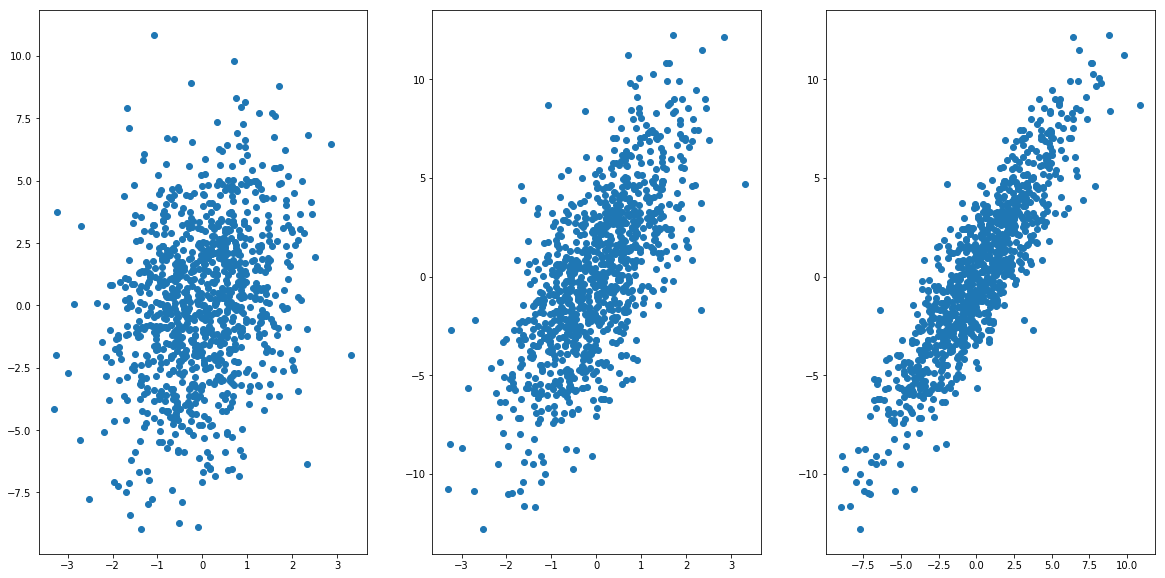

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df.iloc[:,0],df.iloc[:,1])
ax2.scatter(df.iloc[:,0],df.iloc[:,2])
ax3.scatter(df.iloc[:,1],df.iloc[:,2])

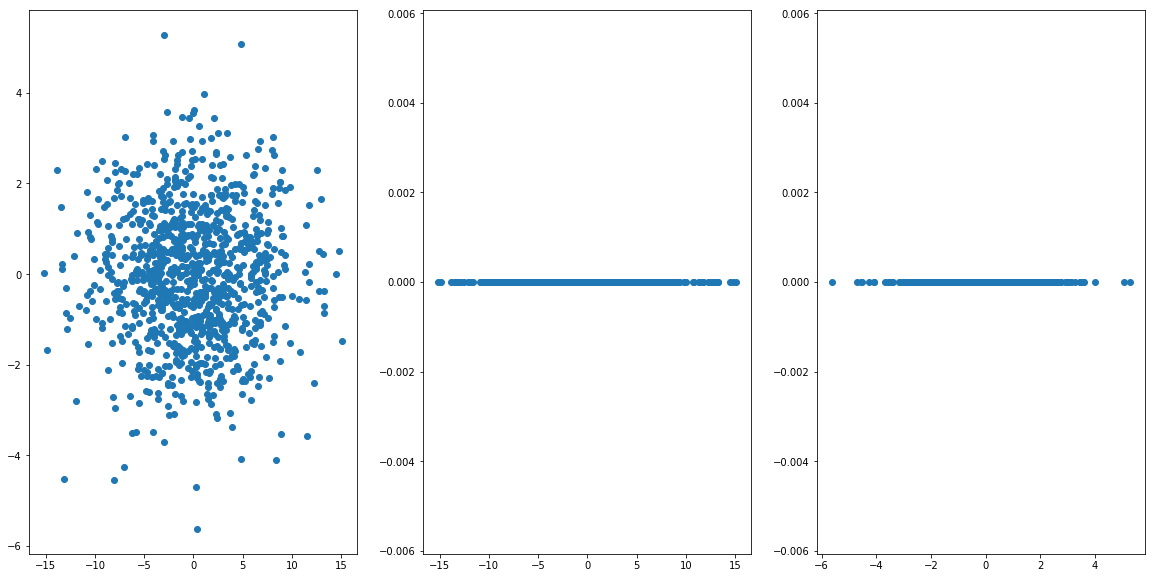

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax2.scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax3.scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])

Text(0.5,1,'new 2 vs 3')

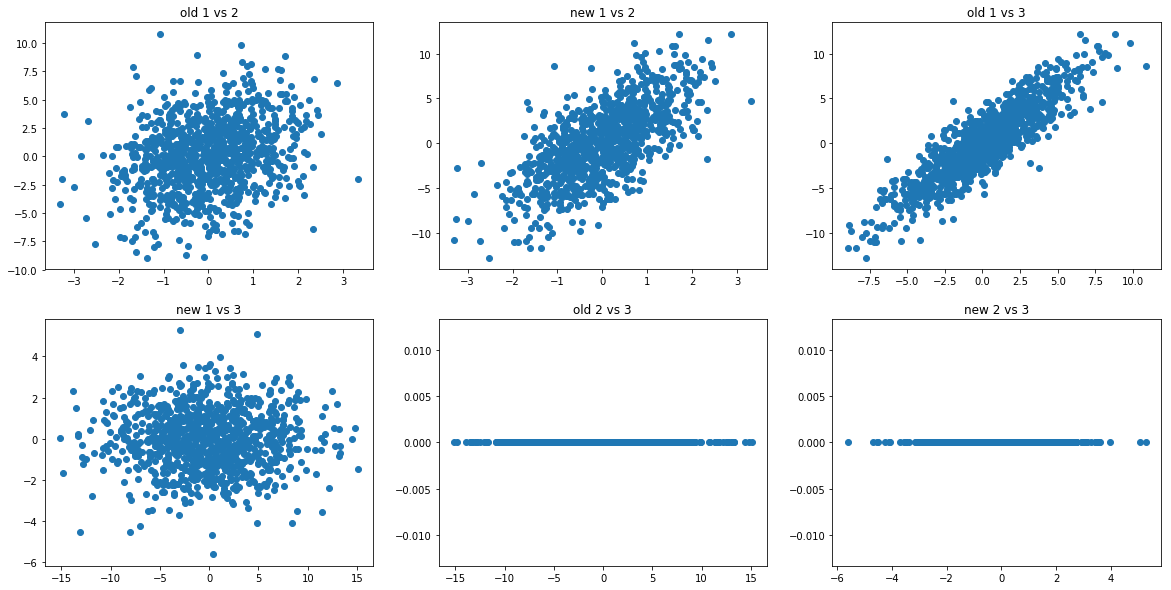

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df.iloc[:,0],df.iloc[:,1])
ax[0,1].scatter(df.iloc[:,0],df.iloc[:,2])
ax[0,2].scatter(df.iloc[:,1],df.iloc[:,2])
ax[1,0].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,1])
ax[1,1].scatter(df_rotated.iloc[:,0],df_rotated.iloc[:,2])
ax[1,2].scatter(df_rotated.iloc[:,1],df_rotated.iloc[:,2])
ax[0,0].set_title("old {} vs {}".format(1,2))
ax[0,1].set_title("new {} vs {}".format(1,2))
ax[0,2].set_title("old {} vs {}".format(1,3))
ax[1,0].set_title("new {} vs {}".format(1,3))
ax[1,1].set_title("old {} vs {}".format(2,3))
ax[1,2].set_title("new {} vs {}".format(2,3))

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [6]:
noise1=np.zeros((1000))
noise2=np.zeros((1000))

for i in range(10):
    sd1=np.random.uniform(0.01,0.03)
    sd2=np.random.uniform(0.01,0.06)
    noise1 = noise1 + np.random.normal(0,sd1,1000)
    noise2 = noise2 + np.random.normal(0,sd2,1000)
    #print(s1)
    
x1 = np.random.normal(0,1,1000) + noise1
x2 = x1 + np.random.normal(0,3,1000) + noise2
#print(x1.shape)
x3 = 2*x1 + x2
df2 = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3})
df2

,x1,x2,x3
0,-0.589337,-1.315936,-2.494611
1,-1.113169,-0.483162,-2.709500
2,-0.457902,-2.043707,-2.959511
3,0.283910,-2.411515,-1.843696
4,1.066900,0.307011,2.440811
5,-0.307319,1.553768,0.939131
6,-0.162757,-5.477441,-5.802955
7,-1.509195,-4.879830,-7.898221
8,-0.745979,5.199746,3.707788
9,-1.136358,-6.012711,-8.285427


In [7]:
cov2=np.cov(df2,rowvar=False)
l2, V2 = la.eig(cov2)
print("covariance matrix:",cov2,'\n')
print("covariance matrix shape:",cov2.shape,'\n')
print("eigenvalues:",l2,'\n')
print("eigenvectors:",V2,'\n')
print("eigenvectors shape:",V2.shape,'\n')
print("covariance matrix with eigendecomposition:",np.dot(V2,np.dot(np.diag(l2), la.inv(V2))),'\n')

covariance matrix: [[ 1.00259211  1.02526005  3.03044427]
 [ 1.02526005 10.34016088 12.39068097]
 [ 3.03044427 12.39068097 18.45156952]] 

covariance matrix shape: (3, 3) 

eigenvalues: [2.77824467e+01+0.j 1.17610000e-15+0.j 2.01187585e+00+0.j] 

eigenvectors: [[-0.11349725 -0.81649658  0.56608454]
 [-0.57981189 -0.40824829 -0.70508971]
 [-0.80680639  0.40824829  0.42707937]] 

eigenvectors shape: (3, 3) 

covariance matrix with eigendecomposition: [[ 1.00259211+0.j  1.02526005+0.j  3.03044427+0.j]
 [ 1.02526005+0.j 10.34016088+0.j 12.39068097+0.j]
 [ 3.03044427+0.j 12.39068097+0.j 18.45156952+0.j]] 



In [8]:
U2, spectrum2, Vt2 = la.svd(df2.T,full_matrices=False)
n = 1000
l2_svd = spectrum2**2/(n-1)
print(U2.shape, np.diag(spectrum2).shape,Vt2.shape)
X2=np.dot(U2,np.dot(np.diag(spectrum2), Vt2))
#print(X,'\n')
print("covariance matrix with SVD:", np.dot(X2,X2.T)/(n-1),'\n')
print("spectrum:",spectrum2,'\n')
print("EIGENVALUES:")
print ("eigendecomposition:",l2)
print ("SVD:",l2_svd,'\n')
print("EIGENVECTORS:")
print ("eigendecomposition:",V2)
print ("SVD:",U2)

(3, 3) (3, 3) (3, 1000)
covariance matrix with SVD: [[ 1.00260329  1.02530358  3.03051015]
 [ 1.02530358 10.34033049 12.39093765]
 [ 3.03051015 12.39093765 18.45195795]] 

spectrum: [1.66599014e+02 4.48315206e+01 1.94709415e-14] 

EIGENVALUES:
eigendecomposition: [2.77824467e+01+0.j 1.17610000e-15+0.j 2.01187585e+00+0.j]
SVD: [2.77830146e+01 2.01187712e+00 3.79497059e-31] 

EIGENVECTORS:
eigendecomposition: [[-0.11349725 -0.81649658  0.56608454]
 [-0.57981189 -0.40824829 -0.70508971]
 [-0.80680639  0.40824829  0.42707937]]
SVD: [[-0.11349784  0.56608442 -0.81649658]
 [-0.57981116 -0.70509032 -0.40824829]
 [-0.80680683  0.42707853  0.40824829]]


In [9]:
df2_rotated=np.dot(df2,U2)
#print(df_rotated)
df2_rotated=pd.DataFrame(df2_rotated)
df2_rotated

,0,1,2
0,2.842552,-0.471155,-1.503706e-16
1,2.592528,-1.446644,6.836855e-17
2,3.624689,-0.082156,-3.567327e-16
3,2.853507,1.073650,-3.878034e-16
4,-2.268363,1.429903,-2.754049e-17
5,-1.623709,-0.868433,3.363375e-16
6,7.876218,1.291638,-7.689201e-16
7,9.373009,-0.786772,-8.405375e-16
8,-5.921673,-2.505061,8.400787e-16
9,10.299951,0.057702,-5.035305e-16


In [10]:
print ("cov2.trace():", cov2.trace(),'\n')
Lambda2=np.diag(l2)
print ("Lambda2.trace():", Lambda2.trace(),'\n')
print("eigenvalues:",l2,'\n')#not ordered
print("singular values:",spectrum2,'\n')#ordered
thresold=0.99
i=0
variability=0
#print(spectrum[0]**2)
while variability<thresold:
    variability += spectrum2[i]**2/(spectrum2**2).sum() #ad essere precisi dovrebbe essere questa la formula
    #variability += spectrum2[i]/spectrum2.sum()
    i +=1
print("number of eigenvalues to keep the",thresold,"% of the total variability:",i)
print("weigths of first + second eigenvalues:",variability)

cov2.trace(): 29.794322514689526 

Lambda2.trace(): (29.794322514689526+0j) 

eigenvalues: [2.77824467e+01+0.j 1.17610000e-15+0.j 2.01187585e+00+0.j] 

singular values: [1.66599014e+02 4.48315206e+01 1.94709415e-14] 

number of eigenvalues to keep the 0.99 % of the total variability: 2
weigths of first + second eigenvalues: 1.0


Text(0.5,1,'new 2 vs 3')

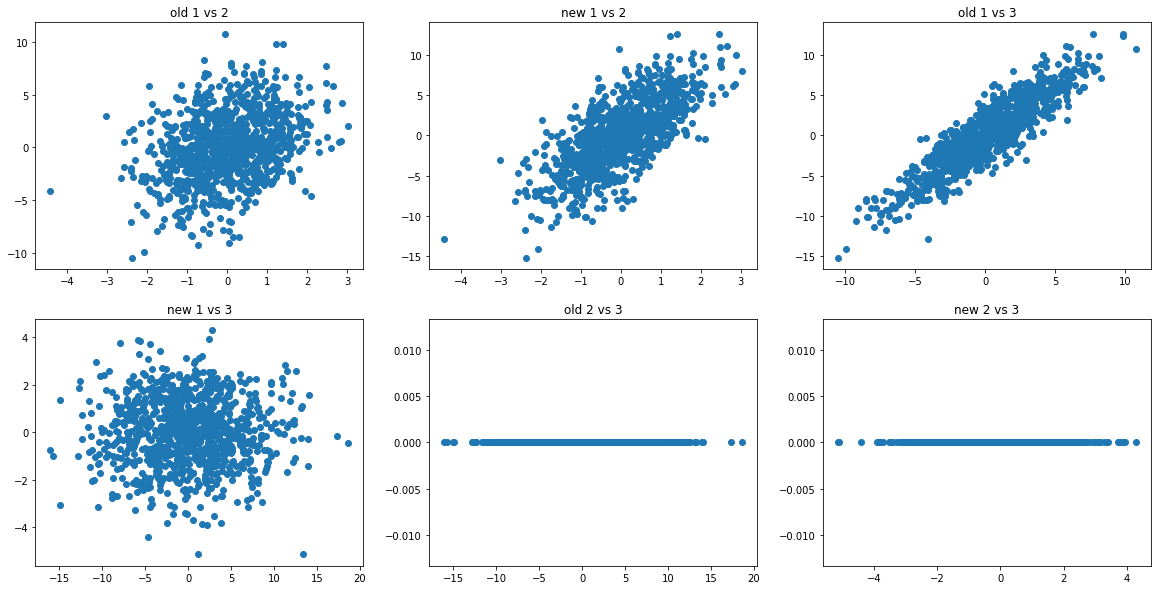

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(df2.iloc[:,0],df2.iloc[:,1])
ax[0,1].scatter(df2.iloc[:,0],df2.iloc[:,2])
ax[0,2].scatter(df2.iloc[:,1],df2.iloc[:,2])
ax[1,0].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,1])
ax[1,1].scatter(df2_rotated.iloc[:,0],df2_rotated.iloc[:,2])
ax[1,2].scatter(df2_rotated.iloc[:,1],df2_rotated.iloc[:,2])
ax[0,0].set_title("old {} vs {}".format(1,2))
ax[0,1].set_title("new {} vs {}".format(1,2))
ax[0,2].set_title("old {} vs {}".format(1,3))
ax[1,0].set_title("new {} vs {}".format(1,3))
ax[1,1].set_title("old {} vs {}".format(2,3))
ax[1,2].set_title("new {} vs {}".format(2,3))

## RESULTS ARE PRATICALLY THE SAME, PCA IS USED ALSO FOR DENOISING
In [PCA](https://stats.stackexchange.com/questions/247260/principal-component-analysis-eliminate-noise-in-the-data) it is asserted that the noise should affects the smallest eigenvalues thus, keeping only the most relevant the noise is reduced

## NOISE IS LOW, otherwise no [meaningful info can be extracted ](http://www.dei.unipd.it/~rossi/courses/HumanData/HDA.html)

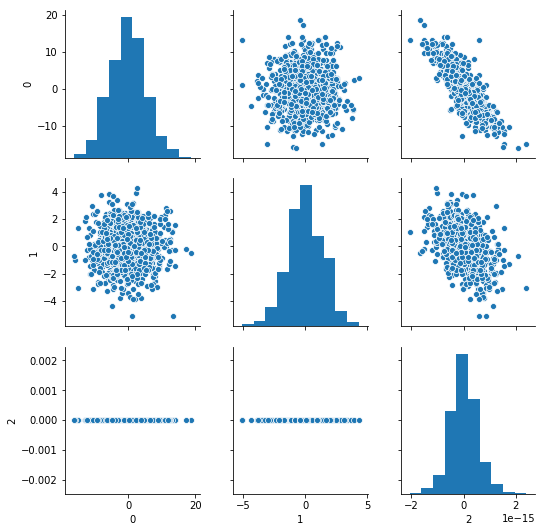

In [12]:
import seaborn as sns
sns.pairplot(df2_rotated)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [14]:
magic = pd.read_csv('../data/magic04.data')

In [24]:
magic
magic.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
magic[magic['category']=='g']=0
magic[magic['category']=='h']=1
magic

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
